Iteration:500/5000
Training Loss:0.256586880314413
Test Loss: 0.25775039001799877
Iteration:1000/5000
Training Loss:0.2160072455158309
Test Loss: 0.22627314715383431
Iteration:1500/5000
Training Loss:0.19976472728628983
Test Loss: 0.21993709180895804
Iteration:2000/5000
Training Loss:0.1901012489037699
Test Loss: 0.21664515144943428
Iteration:2500/5000
Training Loss:0.1781273380377858
Test Loss: 0.2090013087213586
Iteration:3000/5000
Training Loss:0.18879433877195612
Test Loss: 0.22682048850041062
Iteration:3500/5000
Training Loss:0.16829976742492675
Test Loss: 0.20725433908020313
Iteration:4000/5000
Training Loss:0.16468169886031941
Test Loss: 0.206612155867012
Iteration:4500/5000
Training Loss:0.5614284026294509
Test Loss: 0.5892399079985737
Iteration:5000/5000
Training Loss:0.2475311886019334
Test Loss: 0.2708108308726963
Prediction:  [7]
Label:  7


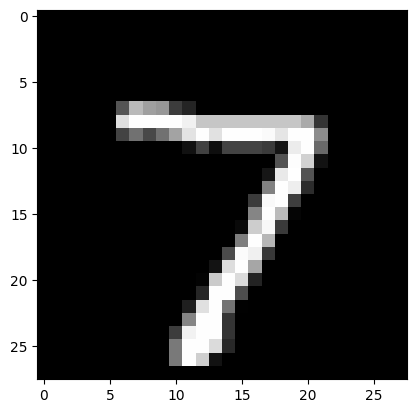

Prediction:  [2]
Label:  2


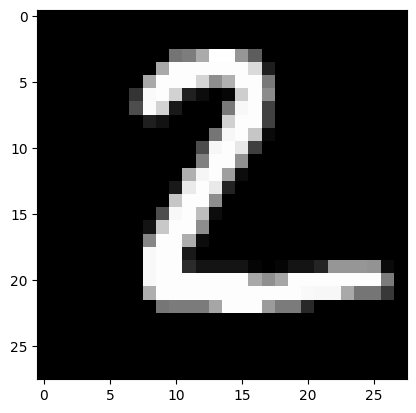

Prediction:  [1]
Label:  1


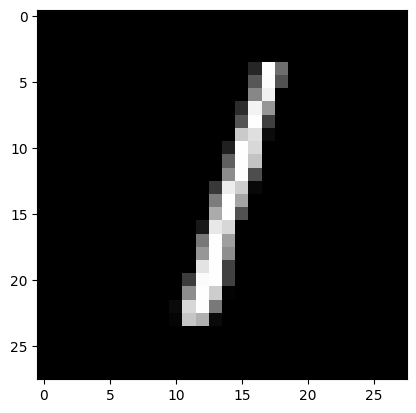

Prediction:  [6]
Label:  6


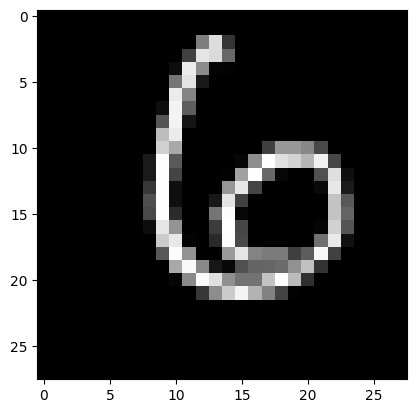

Prediction:  [3]
Label:  3


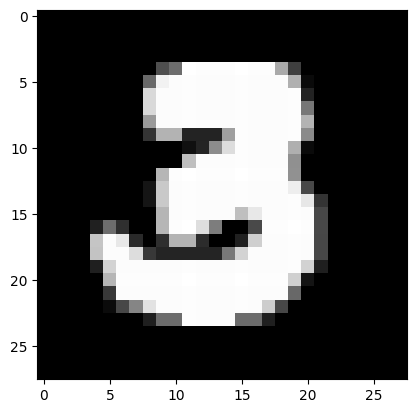

Prediction:  [9]
Label:  9


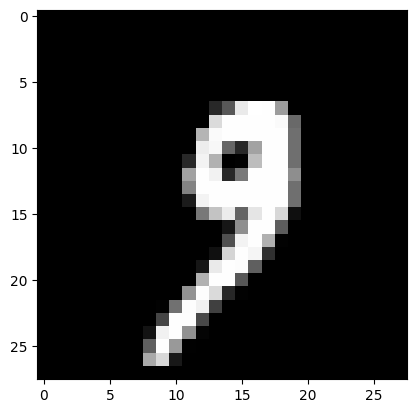

Prediction:  [6]
Label:  5


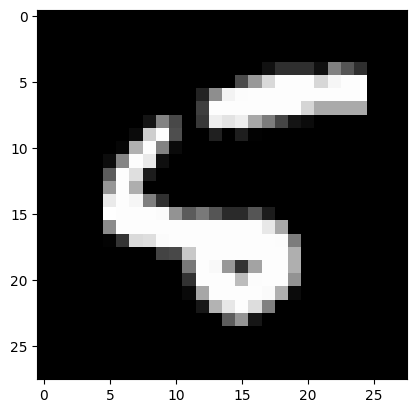

Prediction:  [4]
Label:  4


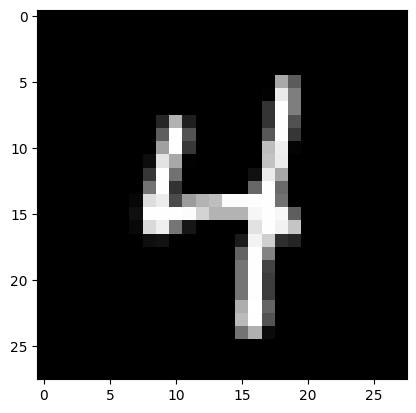

Training Accuracy: 0.9283333333333333
Test Accuracy: 0.9236


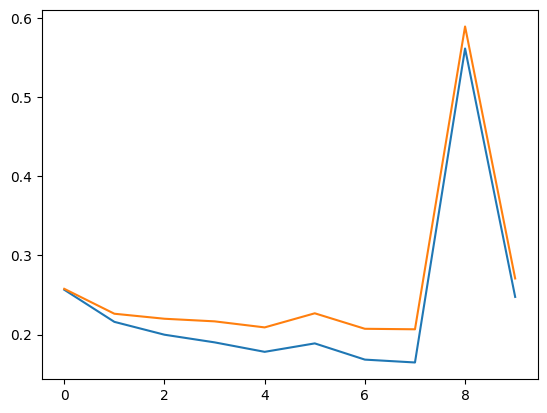

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from keras.datasets import mnist
from keras.models import Model
import keras.backend as K

def ReLU(Z):                                                 #Activation Function
    return np.maximum(Z, 0)

def derivative_ReLU(Z):                                      #Derivative of Activation Function
    return Z > 0                                             #Calculated for Cost Function optimization 

def softmax(Z):
    exp = np.exp(Z - np.max(Z))                              #Converts raw value into Probabilities
    return exp / exp.sum(axis=0)                             #Sum of the Probabilities for each Training Example equals to 1

def init_params(size):
    W1 = np.random.rand(10, size) - 0.5                     #Initializing random values for weights and biases from
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)                                        
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size))           #Converts 
    one_hot_Y[Y, np.arange(Y.size)] = 1                           
    return one_hot_Y

def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2 * (A2 - one_hot_Y)
    dW2 = 1 / m * (dZ2.dot(A1.T))
    db2 = 1 / m * np.sum(dZ2, 1)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1 / m * (dZ1.dot(X.T))
    db1 = 1 / m * np.sum(dZ1, 1)
    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10, 1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10, 1))
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def categorical_crossentropy(Y, A2):
    m = Y.shape[1]
    return -1 / m * np.sum(Y * np.log(A2))

def gradient_descent(X_train, Y_train, X_test, Y_test, alpha, iterations):
    size, m = X_train.shape

    W1, b1, W2, b2 = init_params(size)
    train_losses = []
    test_losses = []

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train, A1, A2, W2, Z1, m)

        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)

        if (i + 1) % int(iterations / 10) == 0:
            print(f"Iteration:{i + 1}/{iterations}")
            train_loss = categorical_crossentropy(one_hot(Y_train), A2)
            train_losses.append(train_loss)
            print(f'Training Loss:{train_loss}')

            _, _, _, test_A2 = forward_propagation(X_test, W1, b1, W2, b2)
            test_loss = categorical_crossentropy(one_hot(Y_test), test_A2)
            test_losses.append(test_loss)
            print(f'Test Loss: {test_loss}')

    return W1, b1, W2, b2, train_losses, test_losses

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index, X, Y, W1, b1, W2, b2):
    vect_X = X[:, index, None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR  
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255  
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], WIDTH * HEIGHT).T / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0], WIDTH * HEIGHT).T / SCALE_FACTOR


W1, b1, W2, b2, train_losses, test_losses = gradient_descent(X_train, Y_train, X_test, Y_test, 0.5, 5000)

show_prediction(0, X_test, Y_test, W1, b1, W2, b2)
show_prediction(1, X_test, Y_test, W1, b1, W2, b2)
show_prediction(2, X_test, Y_test, W1, b1, W2, b2)
show_prediction(100, X_test, Y_test, W1, b1, W2, b2)
show_prediction(200, X_test, Y_test, W1, b1, W2, b2)
show_prediction(1000, X_test, Y_test, W1, b1, W2, b2)
show_prediction(8, X_test, Y_test, W1, b1, W2, b2)
show_prediction(19, X_test, Y_test, W1, b1, W2, b2)

plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(test_losses)), test_losses, label='Test Loss')


predictions_train = make_predictions(X_train, W1, b1, W2, b2)

train_accuracy = get_accuracy(predictions_train, Y_train)
print("Training Accuracy:", train_accuracy)

predictions_test = make_predictions(X_test, W1, b1, W2, b2)
test_accuracy = get_accuracy(predictions_test, Y_test) 
print("Test Accuracy:", test_accuracy)h 

